In [1]:
from tensorly.kruskal import kruskal_to_tensor
from tensortools import cp_als, cp_rand
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)
%matplotlib inline

In [2]:
# params
N = 400
ndim = 3
R = 20

# generate data
true_factors = [np.random.randn(N, R) for _ in range(ndim)]
data = kruskal_to_tensor(true_factors)

In [3]:
fit_kwargs = {"init_factors" : [np.random.randn(N, R) for _ in range(ndim)],
              "verbose" : True,
              "print_every" : 5 }

In [4]:
# run fits
print('CP-ALS\n'+'-'*30)
als_factors, als_info = cp_als(data, R, **fit_kwargs)
print('CP-RAND\n'+'-'*30)
rand_factors, rand_info = cp_rand(data, R, **fit_kwargs)

CP-ALS
------------------------------
iter=0, error=1.4180993363444254
iter=5, error=0.35691402331141137, variation=0.016656109806686803
converged in 9 iterations.
CP-RAND
------------------------------
iter=0, error=1.4319637270266208
iter=5, error=0.3384193429800712, variation=0.19486278695543707
iter=10, error=0.164138711440023, variation=0.07133336616969582
iter=15, error=8.783268853381046e-05, variation=0.0003137517257249065
converged in 19 iterations.


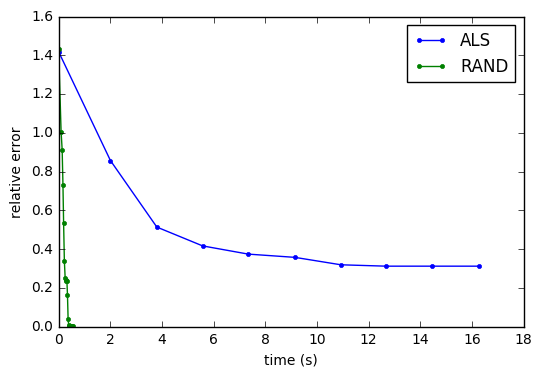

In [5]:
plt.figure()
plt.plot(als_info['t_elapsed'], als_info['rec_errors'], '.-', label='ALS')
plt.plot(rand_info['t_elapsed'], rand_info['rec_errors'], '.-', label='RAND')
plt.legend(loc='best')
plt.ylabel('relative error')
plt.xlabel('time (s)')